In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

In [2]:
saws_df = wrangle.wrangle_saws()

In [3]:
saws_df = wrangle.clean_saws(saws_df)

In [4]:
saws_avg = pd.DataFrame(saws_df.mean(axis=1))
saws_avg = saws_avg.rename(columns ={0:'gallons'})

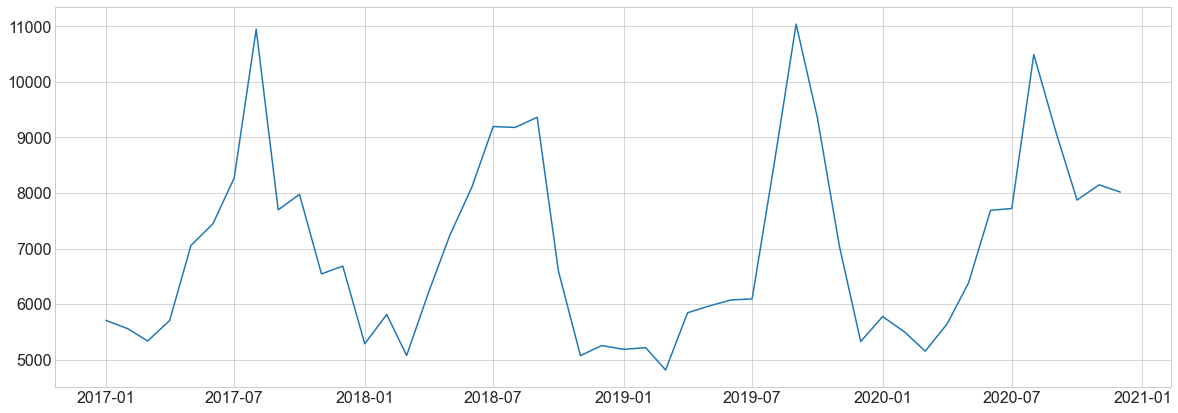

In [5]:
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.plot(saws_avg.index, saws_avg.gallons)

In [6]:
sound_df = wrangle.wrangle_sound()
sound_df = sound_df.set_index('DateTime')

In [7]:
sound_df

,NoiseLevel_db
DateTime,
2021-05-16 00:01:26,60
2021-05-16 00:04:26,60
2021-05-16 00:07:26,60
2021-05-16 00:10:26,60
2021-05-16 00:13:26,60
...,...
2021-05-01 23:35:00,60
2021-05-01 23:40:00,60
2021-05-01 23:45:00,61


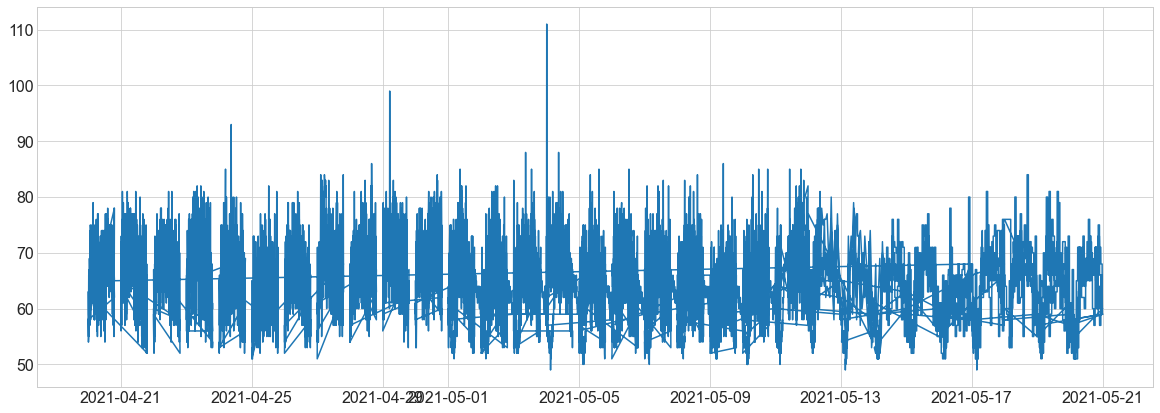

In [8]:
plt.plot(sound_df.index, sound_df.NoiseLevel_db)

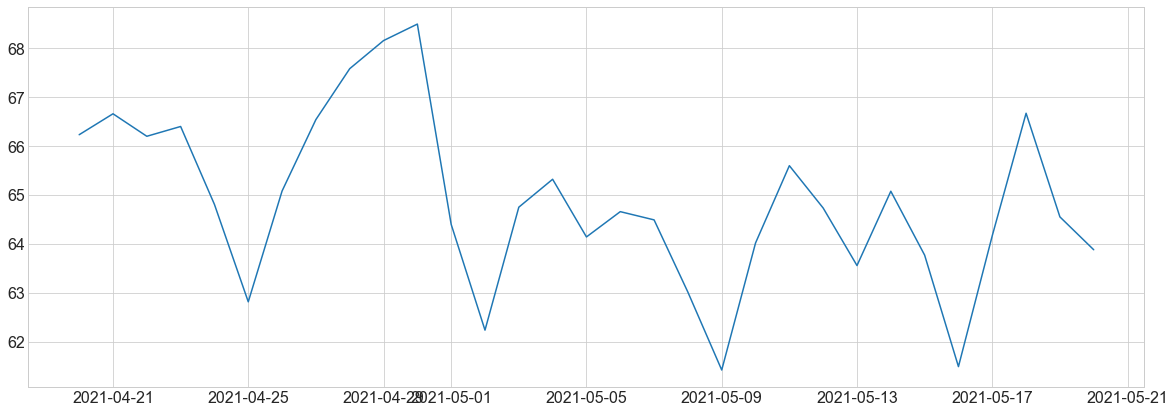

In [9]:
plt.plot(sound_df.resample('D').mean())

[Text(0.5, 1.0, 'Average Noise Level by Hour'),
 Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Decibels')]

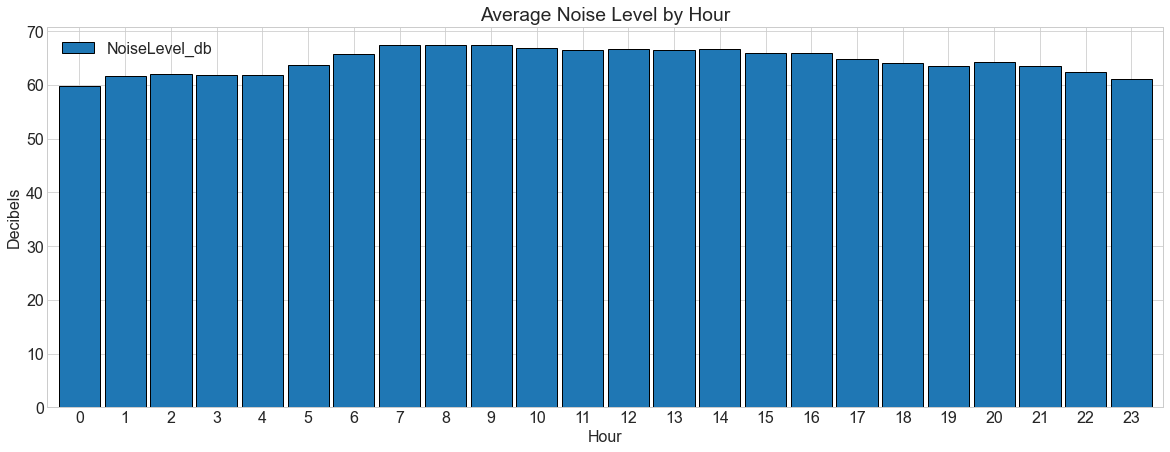

In [24]:
woosh = sound_df.resample('H').mean()
ax = woosh.groupby(woosh.index.hour).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Hour', xlabel='Hour', ylabel='Decibels')

[Text(0.5, 1.0, 'Average Noise Level by Day of Week'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Decibels')]

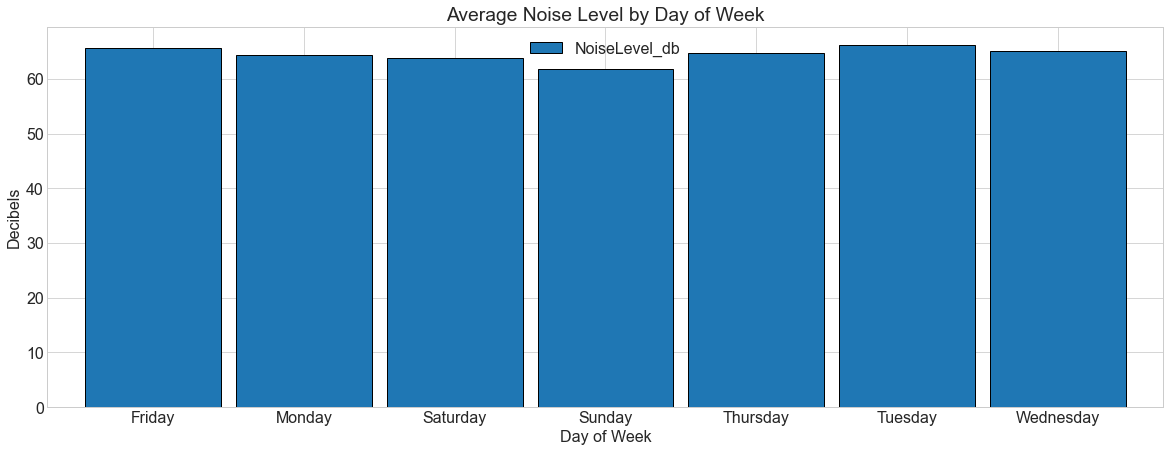

In [11]:
ax = sound_df.groupby(sound_df.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Noise Level by Day of Week', xlabel='Day of Week', ylabel='Decibels')

In [12]:
flood_df = wrangle.clean_flood()

In [13]:
flood_df = flood_df.set_index('datetime')

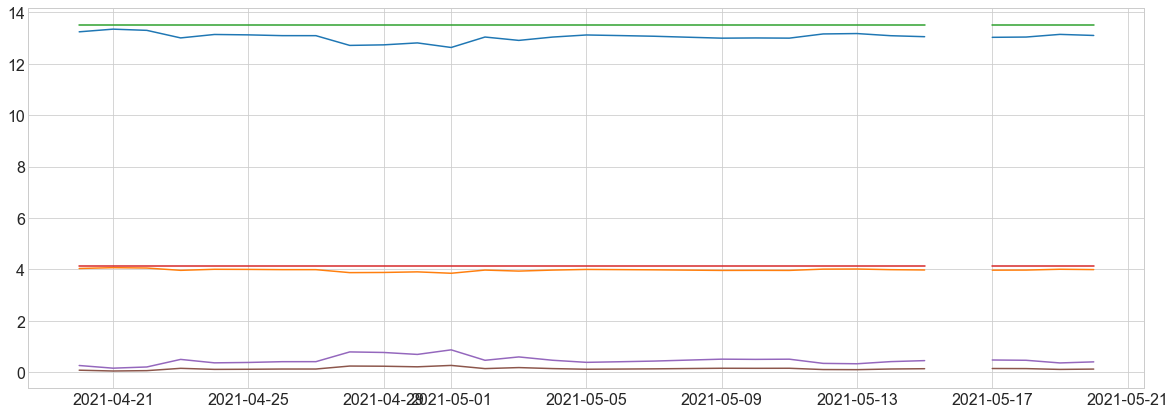

In [14]:
plt.plot(flood_df.resample('D').mean())

In [15]:
flood_df.columns.index = ['datetime', 'water_level_feet', 'water_level_meters', 'flood_width_feet', 'flood_width_meters']

In [44]:
air_df = wrangle.clean_air()

In [45]:
air_df.datetime = pd.to_datetime(air_df.datetime)
air_df = air_df.set_index('datetime')
air_df = air_df.sort_index()
air1_df = air_df[(air_df['Pm1_0'] < 500) & (air_df['Pm1_0'] > -50)]

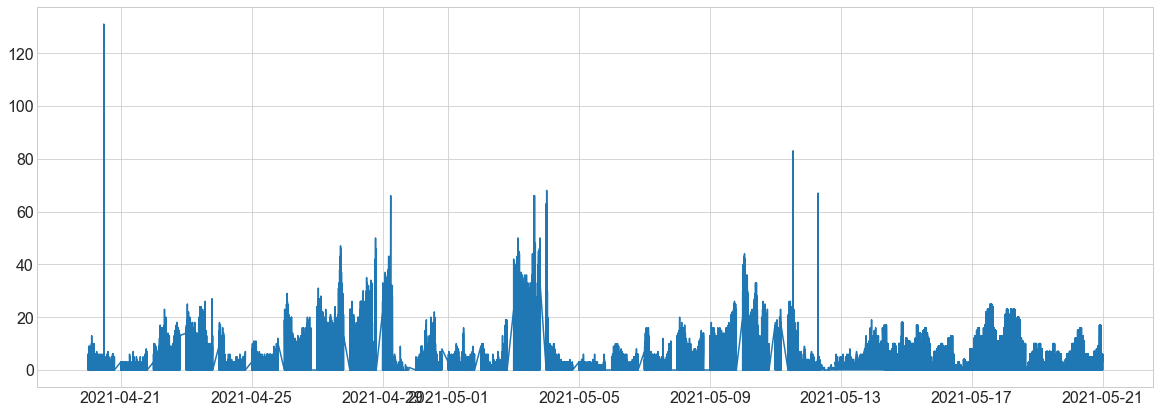

In [47]:
plt.plot(air1_df.index, air1_df.Pm1_0)

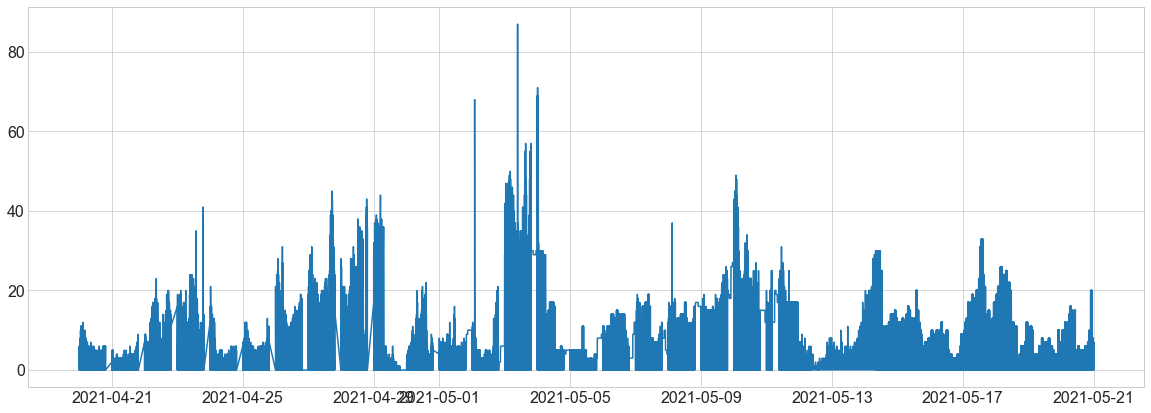

In [50]:
air25_df = air_df[(air_df['Pm2_5'] < 500) & (air_df['Pm2_5'] > -50)]
plt.plot(air25_df.index, air25_df.Pm2_5)

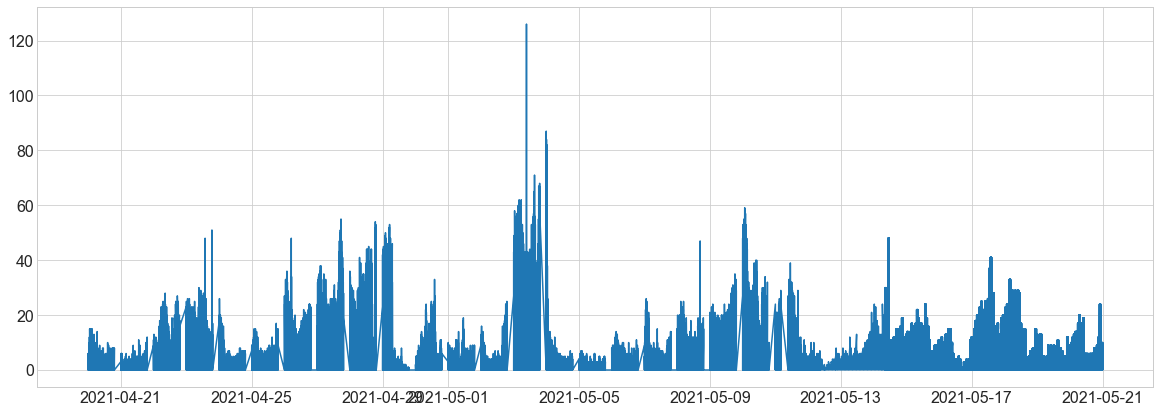

In [51]:
air10_df = air_df[(air_df['Pm10'] < 500) & (air_df['Pm10'] > -50)]
plt.plot(air10_df.index, air10_df.Pm10)

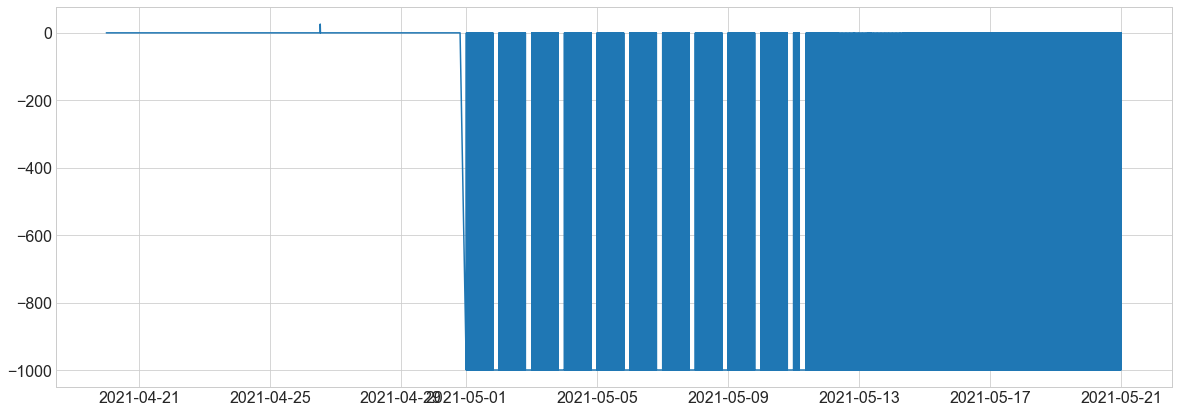

In [53]:
plt.plot(air_df.index, air_df.SO2)

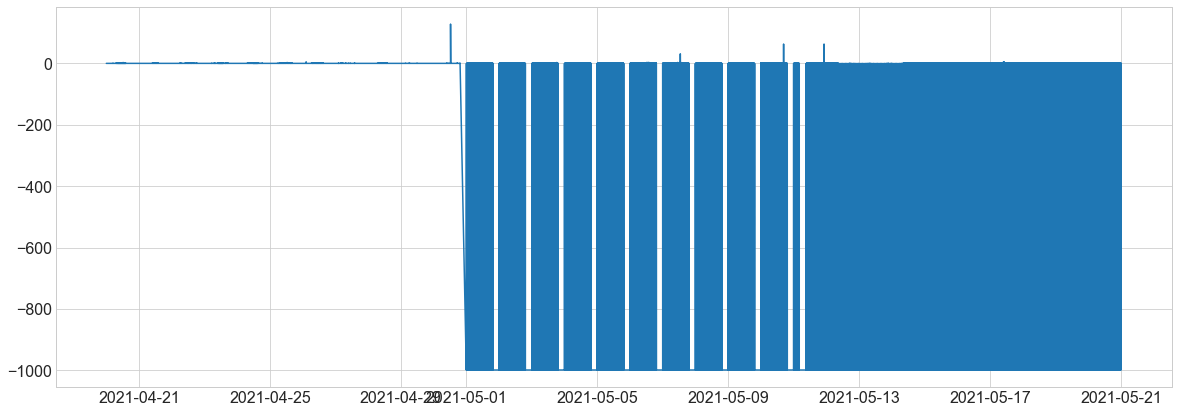

In [54]:
plt.plot(air_df.index, air_df.O3)

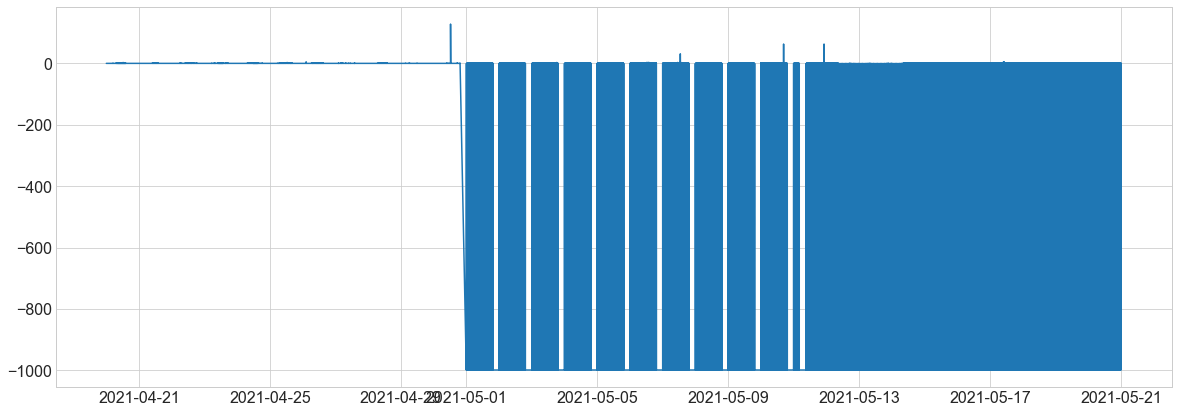

In [56]:
plt.plot(air_df.index, air_df.CO)

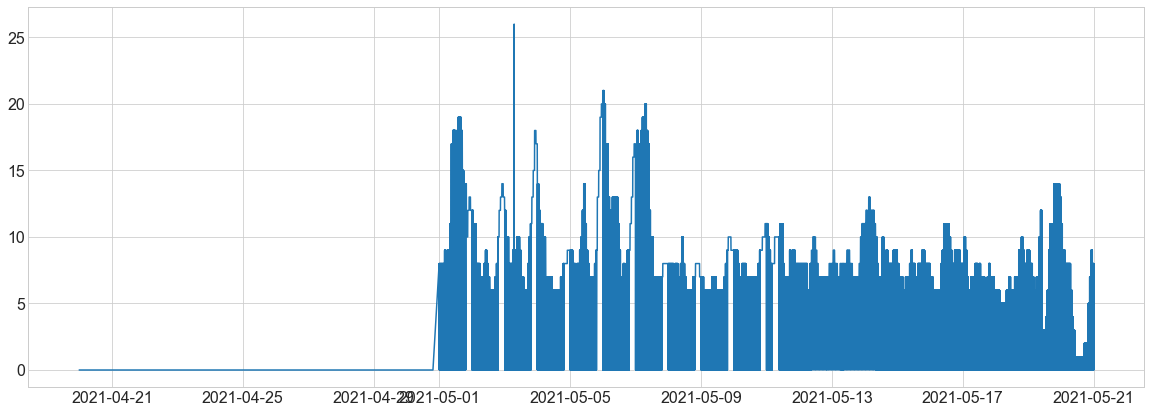

In [57]:
plt.plot(air_df.index, air_df.NO2)